# Base Model

## Data Collection

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

from sklearn.model_selection import RepeatedStratifiedKFold

#from xgboost import XGBClassifier
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import math as mt
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as ltb
import xgboost as xgb
%matplotlib inline

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [94]:
Breast_cancer = pd.read_csv(r"C:\Users\amits\OneDrive\Documents\project699\breast-cancer699.csv")
Breast_cancer

id  clump_thickness  size_uniformity  shape_uniformity  \
0    1000025                5                1                 1   
1    1002945                5                4                 4   
2    1015425                3                1                 1   
3    1016277                6                8                 8   
4    1017023                4                1                 1   
..       ...              ...              ...               ...   
694   776715                3                1                 1   
695   841769                2                1                 1   
696   888820                5               10                10   
697   897471                4                8                 6   
698   897471                4                8                 8   

     marginal_adhesion  epithelial_size bare_nucleoli  bland_chromatin  \
0                    1                2             1                3   
1                    5                7            10                3   
2                    1                2             2                3   
3                    1                3             4                3   
4                    3                2             1                3   
..                 ...              ...           ...              ...   
694                  1                3             2                1   
695                  1                2             1                1   
696                  3                7             3                8   
697                  4                3             4               10   
698                  5                4             5               10   

     normal_nucleoli  mitoses  class  
0                  1        1      2  
1                  2        1      2  
2                  1        1      2  
3                  7        1      2  
4                  1        1      2  
..               ...      ...    ...  
694                1        1      2  
695                1        1      2  
696               10        2      4  
697                6        1      4  
698                4        1      4  

[699 rows x 11 columns]

## Null Check 

In [95]:
Breast_cancer.isnull().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

## ID Remove

In [96]:
Breast_cancer = Breast_cancer.drop(columns=['id'])


## Datatype Check and convert

In [97]:
Breast_cancer.dtypes

clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [98]:
Breast_cancer['bare_nucleoli'] = Breast_cancer['bare_nucleoli'].astype('category')


In [99]:
Breast_cancer.dtypes

clump_thickness         int64
size_uniformity         int64
shape_uniformity        int64
marginal_adhesion       int64
epithelial_size         int64
bare_nucleoli        category
bland_chromatin         int64
normal_nucleoli         int64
mitoses                 int64
class                   int64
dtype: object

## Label encoding of class

In [100]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the 'class' column
Breast_cancer['class'] = label_encoder.fit_transform(Breast_cancer['class'])


In [101]:
Breast_cancer

clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion  \
0                  5                1                 1                  1   
1                  5                4                 4                  5   
2                  3                1                 1                  1   
3                  6                8                 8                  1   
4                  4                1                 1                  3   
..               ...              ...               ...                ...   
694                3                1                 1                  1   
695                2                1                 1                  1   
696                5               10                10                  3   
697                4                8                 6                  4   
698                4                8                 8                  5   

     epithelial_size bare_nucleoli  bland_chromatin  normal_nucleoli  mitoses  \
0                  2             1                3                1        1   
1                  7            10                3                2        1   
2                  2             2                3                1        1   
3                  3             4                3                7        1   
4                  2             1                3                1        1   
..               ...           ...              ...              ...      ...   
694                3             2                1                1        1   
695                2             1                1                1        1   
696                7             3                8               10        2   
697                3             4               10                6        1   
698                4             5               10                4        1   

     class  
0        0  
1        0  
2        0  
3        0  
4        0  
..     ...  
694      0  
695      0  
696      1  
697      1  
698      1  

[699 rows x 10 columns]

In [102]:
# Check for string values like '?'
print(Breast_cancer.isin(['?']).sum())

clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64


In [103]:
# Replace '?' with NaN
Breast_cancer['bare_nucleoli'] = Breast_cancer['bare_nucleoli'].replace('?', np.nan)

# Convert to numeric (this turns valid strings into numbers, and '?' is now NaN)
Breast_cancer['bare_nucleoli'] = pd.to_numeric(Breast_cancer['bare_nucleoli'])

# Fill NaNs with mode
mode_value = Breast_cancer['bare_nucleoli'].mode()[0]
Breast_cancer['bare_nucleoli'] = Breast_cancer['bare_nucleoli'].fillna(mode_value)

# Make sure it's an integer if needed
Breast_cancer['bare_nucleoli'] = Breast_cancer['bare_nucleoli'].astype(int)


In [104]:
print(Breast_cancer.isin(['?']).sum())

clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64


## Kfold 

In [105]:
# Features and target
I = Breast_cancer.drop('class', axis=1)  # Replace 'target_column' with your actual target column name
J = Breast_cancer['class']

# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Store accuracy for each fold
fold_accuracies = []

# Loop through each fold
for fold, (train_index, test_index) in enumerate(kf.split(I), 1):
    I_train, I_test = I.iloc[train_index], I.iloc[test_index]
    J_train, J_test = J.iloc[train_index], J.iloc[test_index]

    # Initialize model
    model = RandomForestClassifier(random_state=42)
    
    # Fit model
    model.fit(I_train, J_train)
    
    # Predict
    J_pred = model.predict(I_test)
    
    # Evaluate
    accuracy = accuracy_score(J_test, J_pred)
    fold_accuracies.append(accuracy)
    
    print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

# Average accuracy across all folds
print(f"\nAverage Accuracy: {np.mean(fold_accuracies):.4f}")


Fold 1: Accuracy = 0.9571
Fold 2: Accuracy = 0.9714
Fold 3: Accuracy = 0.9857
Fold 4: Accuracy = 0.9571
Fold 5: Accuracy = 0.9714
Fold 6: Accuracy = 0.9714
Fold 7: Accuracy = 0.9857
Fold 8: Accuracy = 0.9571
Fold 9: Accuracy = 0.9571
Fold 10: Accuracy = 0.9565

Average Accuracy: 0.9671


## Classification

In [106]:
# Classifiers dictionary
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    # 'Rotation Forest': CustomRotationForest(),  # Placeholder
}

# Evaluate each classifier
for name, clf in classifiers.items():
    fold_accuracies = []
    print(f"\nClassifier: {name}")
    
    for fold, (train_index, test_index) in enumerate(kf.split(I), 1):
        I_train, I_test = I.iloc[train_index], I.iloc[test_index]
        J_train, J_test = J.iloc[train_index], J.iloc[test_index]
        
        clf.fit(I_train, J_train)
        J_pred = clf.predict(I_test)
        accuracy = accuracy_score(J_test, J_pred)
        fold_accuracies.append(accuracy)
        
        #print(f"Fold {fold}: Accuracy = {accuracy:.4f}")
    
    print(f"Average Accuracy for {name}: {np.mean(fold_accuracies):.4f}")



Classifier: Logistic Regression
Average Accuracy for Logistic Regression: 0.9656

Classifier: K-Nearest Neighbors
Average Accuracy for K-Nearest Neighbors: 0.9685

Classifier: Support Vector Machine
Average Accuracy for Support Vector Machine: 0.9671

Classifier: Naive Bayes
Average Accuracy for Naive Bayes: 0.9599

Classifier: Decision Tree
Average Accuracy for Decision Tree: 0.9328

Classifier: Random Forest
Average Accuracy for Random Forest: 0.9671


In [107]:
Breast_cancer

clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion  \
0                  5                1                 1                  1   
1                  5                4                 4                  5   
2                  3                1                 1                  1   
3                  6                8                 8                  1   
4                  4                1                 1                  3   
..               ...              ...               ...                ...   
694                3                1                 1                  1   
695                2                1                 1                  1   
696                5               10                10                  3   
697                4                8                 6                  4   
698                4                8                 8                  5   

     epithelial_size  bare_nucleoli  bland_chromatin  normal_nucleoli  \
0                  2              1                3                1   
1                  7             10                3                2   
2                  2              2                3                1   
3                  3              4                3                7   
4                  2              1                3                1   
..               ...            ...              ...              ...   
694                3              2                1                1   
695                2              1                1                1   
696                7              3                8               10   
697                3              4               10                6   
698                4              5               10                4   

     mitoses  class  
0          1      0  
1          1      0  
2          1      0  
3          1      0  
4          1      0  
..       ...    ...  
694        1      0  
695        1      0  
696        2      1  
697        1      1  
698        1      1  

[699 rows x 10 columns]

# Propose Model

## Data colaction

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

from sklearn.model_selection import RepeatedStratifiedKFold

#from xgboost import XGBClassifier
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import math as mt
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as ltb
import xgboost as xgb
%matplotlib inline

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [109]:
df_cancer2 = pd.read_csv(r"C:\Users\amits\OneDrive\Documents\project699\breast-cancer699.csv")

In [110]:
df_cancer2.head()

id  clump_thickness  size_uniformity  shape_uniformity  \
0  1000025                5                1                 1   
1  1002945                5                4                 4   
2  1015425                3                1                 1   
3  1016277                6                8                 8   
4  1017023                4                1                 1   

   marginal_adhesion  epithelial_size bare_nucleoli  bland_chromatin  \
0                  1                2             1                3   
1                  5                7            10                3   
2                  1                2             2                3   
3                  1                3             4                3   
4                  3                2             1                3   

   normal_nucleoli  mitoses  class  
0                1        1      2  
1                2        1      2  
2                1        1      2  
3                7        1      2  
4                1        1      2

In [111]:
df_cancer2.tail()

id  clump_thickness  size_uniformity  shape_uniformity  \
694  776715                3                1                 1   
695  841769                2                1                 1   
696  888820                5               10                10   
697  897471                4                8                 6   
698  897471                4                8                 8   

     marginal_adhesion  epithelial_size bare_nucleoli  bland_chromatin  \
694                  1                3             2                1   
695                  1                2             1                1   
696                  3                7             3                8   
697                  4                3             4               10   
698                  5                4             5               10   

     normal_nucleoli  mitoses  class  
694                1        1      2  
695                1        1      2  
696               10        2      4  
697                6        1      4  
698                4        1      4

In [112]:
df_cancer2.columns

Index(['id', 'clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [113]:
df_cancer2.duplicated().sum()

8

In [114]:
df_cancer2 = df_cancer2.drop_duplicates()

In [115]:
df_cancer2.isnull().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [116]:
# Replace '?' with NaN
df_cancer2['bare_nucleoli'] = df_cancer2['bare_nucleoli'].replace('?', np.nan)

# Convert to numeric (this turns valid strings into numbers, and '?' is now NaN)
df_cancer2['bare_nucleoli'] = pd.to_numeric(df_cancer2['bare_nucleoli'])

# Fill NaNs with mode
mode_value = df_cancer2['bare_nucleoli'].mode()[0]
df_cancer2['bare_nucleoli'] = df_cancer2['bare_nucleoli'].fillna(mode_value)

# Make sure it's an integer if needed
df_cancer2['bare_nucleoli'] = df_cancer2['bare_nucleoli'].astype(int)

## Id remove

In [117]:
df_cancer2 = df_cancer2.drop(columns=['id'])

# Outlier detaction

# Outlier remove

In [118]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest



# Convert categorical columns to numerical
for col in df_cancer2.select_dtypes(include=['object', 'category']).columns:
    df_cancer2[col] = pd.factorize(df_cancer2[col])[0]  

# Define feature matrix (X)
X = df_cancer2.to_numpy()  # Convert DataFrame to NumPy array

# Initialize and fit Isolation Forest
iforest = IsolationForest(contamination=0.1, random_state=42)
iforest.fit(X)

# Predict outliers (-1 = outlier, 1 = inlier)
y_pred = iforest.predict(X)

# Remove outliers from dataset
df_cancer = df_cancer2.loc[y_pred == 1].reset_index(drop=True)


# Print summary
print(f"✅ Outlier removal complete!")
print(f"Original dataset size: {df_cancer2.shape[0]} rows")
print(f"Cleaned dataset size: {df_cancer.shape[0]} rows")
print(f"Outliers removed: {df_cancer2.shape[0] - df_cancer.shape[0]}")


✅ Outlier removal complete!
Original dataset size: 691 rows
Cleaned dataset size: 622 rows
Outliers removed: 69


In [119]:
df_cancer

clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion  \
0                  5                1                 1                  1   
1                  5                4                 4                  5   
2                  3                1                 1                  1   
3                  4                1                 1                  3   
4                  8               10                10                  8   
..               ...              ...               ...                ...   
617                3                1                 1                  1   
618                2                1                 1                  1   
619                5               10                10                  3   
620                4                8                 6                  4   
621                4                8                 8                  5   

     epithelial_size  bare_nucleoli  bland_chromatin  normal_nucleoli  \
0                  2              1                3                1   
1                  7             10                3                2   
2                  2              2                3                1   
3                  2              1                3                1   
4                  7             10                9                7   
..               ...            ...              ...              ...   
617                3              2                1                1   
618                2              1                1                1   
619                7              3                8               10   
620                3              4               10                6   
621                4              5               10                4   

     mitoses  class  
0          1      2  
1          1      2  
2          1      2  
3          1      2  
4          1      4  
..       ...    ...  
617        1      2  
618        1      2  
619        2      4  
620        1      4  
621        1      4  

[622 rows x 10 columns]

# Encoding

In [120]:
en_data_OHE = df_cancer[["class"]]
pd.get_dummies(en_data_OHE)
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop="first")
ar=ohe.fit_transform(en_data_OHE).toarray()
df_cancer=df_cancer.copy()
df_cancer[["class"]]=pd.DataFrame(ar,columns=["class"])

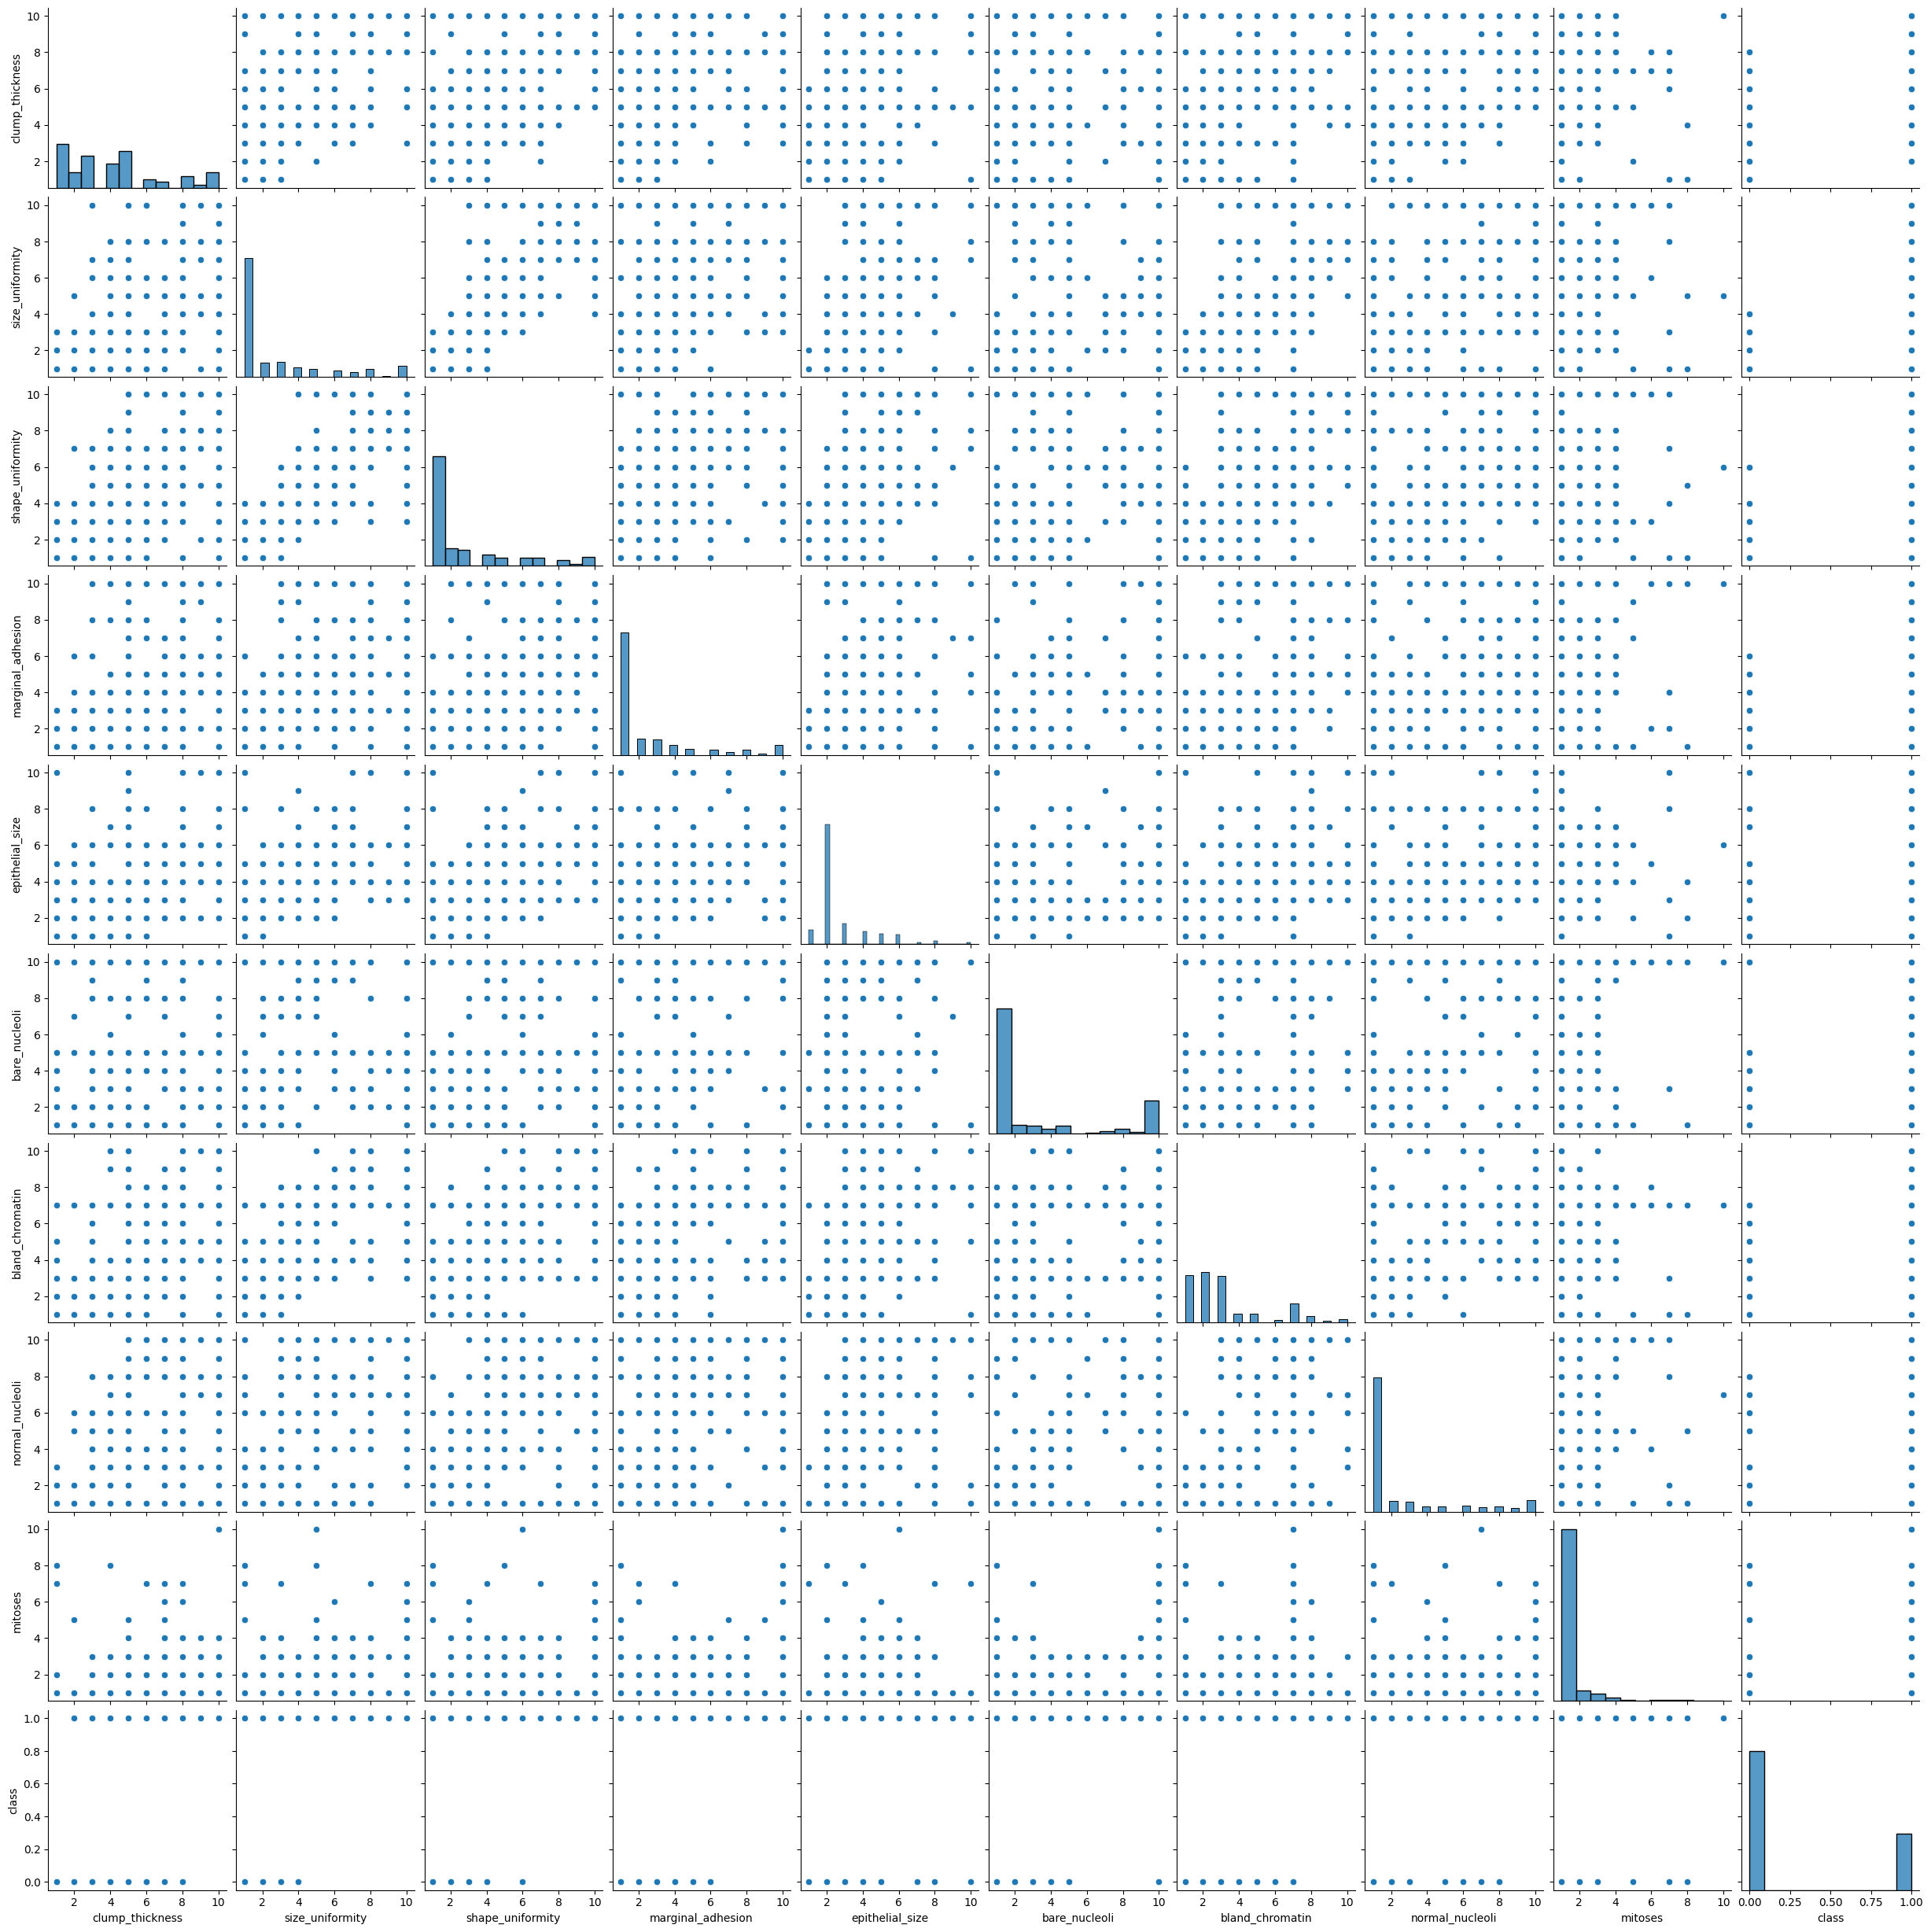

In [121]:
sns.pairplot(df_cancer , vars =['clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'])

In [122]:
# sns.pairplot(df_cancer ,hue ='diagnosis', vars =['Radius_mean','Texture_mean', 'perimeter_mean', 'area_mean',
#  'smoothness_mean', 'compactness_mean' ,'concavity_mean']) 

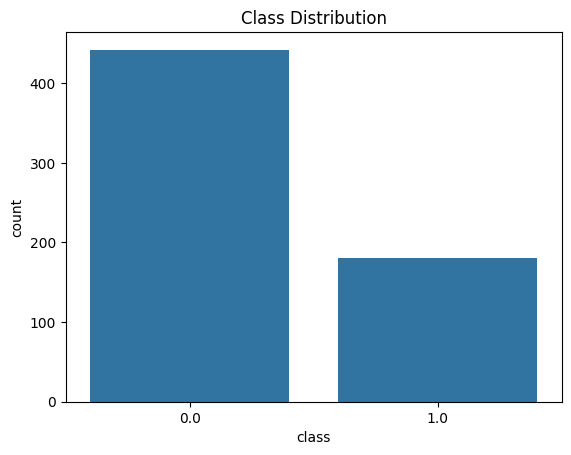

In [123]:
sns.countplot(x=df_cancer['class'])
plt.title('Class Distribution')
plt.show()

In [124]:
# sns.scatterplot(x='area_mean',y='smoothness_mean',hue='diagnosis',data =df_cancer)

<Axes: >

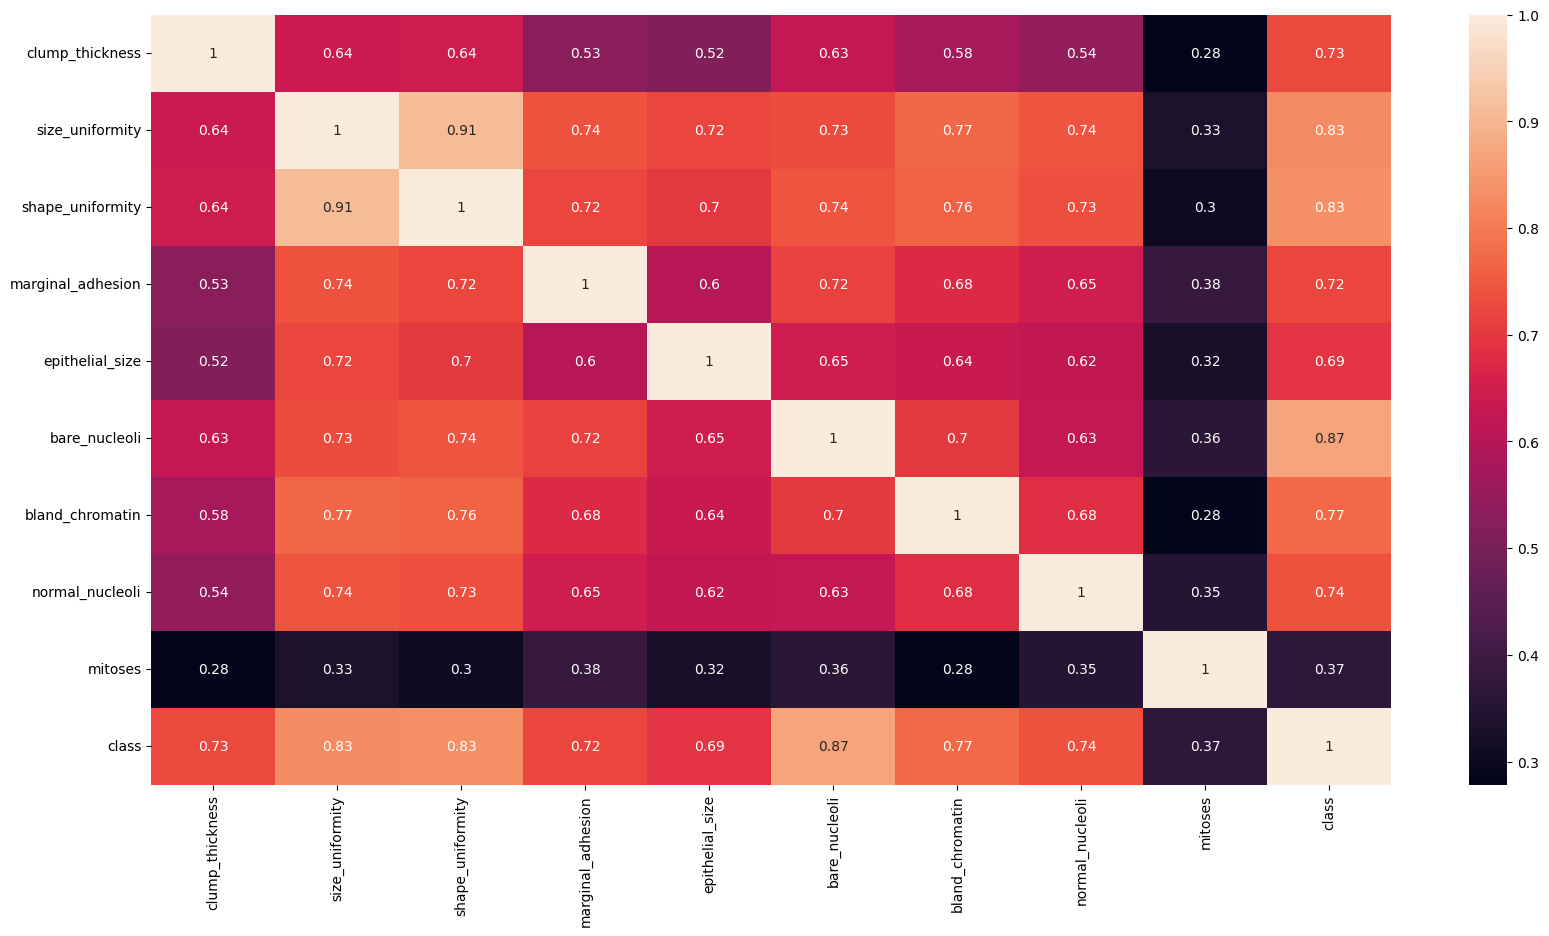

In [125]:
plt.figure(figsize =(20,10))
sns.heatmap(df_cancer.corr(), annot =True)

# Geting X and y

In [126]:
# Defining the X and y
X = df_cancer.drop('class',axis=1)
y = df_cancer['class']

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Feature Selection

In [127]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display feature importance
print(feature_importance_df)

             Feature  Importance
1    size_uniformity    0.247862
2   shape_uniformity    0.243872
5      bare_nucleoli    0.239489
7    normal_nucleoli    0.096356
6    bland_chromatin    0.084094
0    clump_thickness    0.042136
4    epithelial_size    0.027972
3  marginal_adhesion    0.014676
8            mitoses    0.003543


In [128]:
selected_features = feature_importance_df["Feature"].head(5).values
X_selected = X[selected_features]

In [129]:
# Splitting the data into training and testing sets
# train test split
# Splitting the data into training and testing sets
# train test split

#X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

X_train0, X_test, y_train0, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train0, y_train0)

In [130]:
# Checking the train distribution of dependent variable
y_train.value_counts()

class
0.0    355
1.0    355
Name: count, dtype: int64

In [131]:
# Create a StandardScaler object to standardize the data
scaler = StandardScaler()

# Apply the StandardScaler to the training data (X_train) to standardize it
X_train = scaler.fit_transform(X_train)

# Apply the same standardization to the testing data (X_test) to maintain consistency
X_test = scaler.transform(X_test)

# Trainig Model

In [132]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")
    
    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score


In [133]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 macro Train', 'F1 macro Test'])

In [134]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)


Train ROC AUC: 0.9788732394366197
Test ROC AUC: 0.9810949788263763


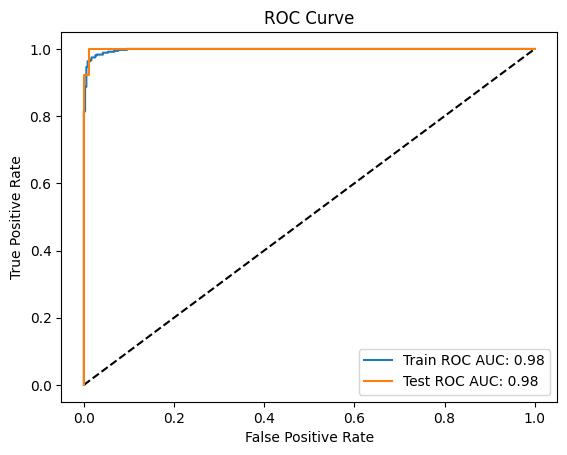


Confusion Matrix:


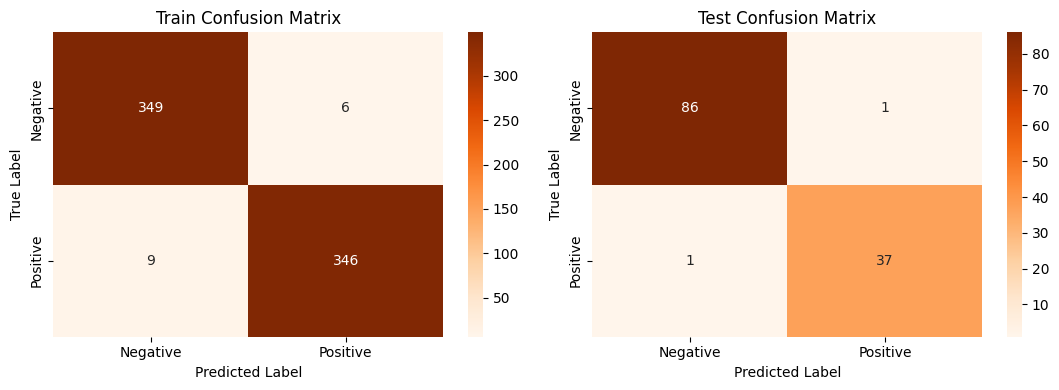


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.97486  | 0.983099 |   0.978962 | 355        |
| 1.0          |    0.982955 | 0.974648 |   0.978784 | 355        |
| accuracy     |    0.978873 | 0.978873 |   0.978873 |   0.978873 |
| macro avg    |    0.978907 | 0.978873 |   0.978873 | 710        |
| weighted avg |    0.978907 | 0.978873 |   0.978873 | 710        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.988506 | 0.988506 |   0.988506 |    87     |
| 1.0          |    0.973684 | 0.973684 |   0.973684 |    38     |
| accuracy     |    0.984    | 0.984    |   0.984    |     0.984 |
| macro avg    |    0.981095 | 0.981095 |   0.981095 |   125     |
| weighted avg |    0.984    | 0.984    |   0.984    |   125   

In [135]:
lr_score = evaluate_model(lr_model, X_train, X_test, y_train, y_test)

In [136]:
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

Logistic regression
Precision Train             0.978907
Precision Test              0.984000
Recall Train                0.978873
Recall Test                 0.984000
Accuracy Train              0.978873
Accuracy Test               0.984000
ROC-AUC Train               0.978873
ROC-AUC Test                0.981095
F1 macro Train              0.978873
F1 macro Test               0.984000

# Using k-fold

In [137]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(X_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 100, 'penalty': 'l1', 'solver': 'saga'}


In [138]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Train ROC AUC: 0.9774647887323944
Test ROC AUC: 0.9810949788263763


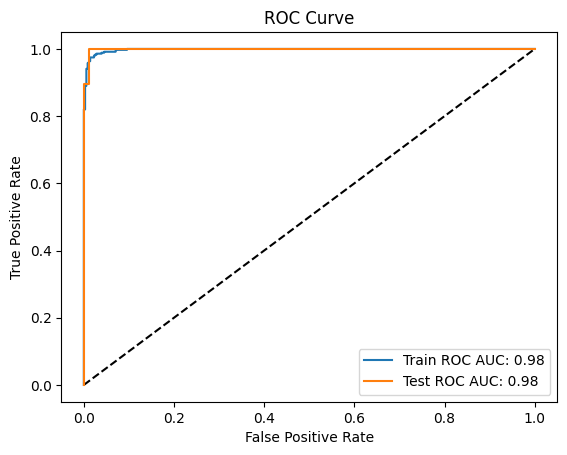


Confusion Matrix:


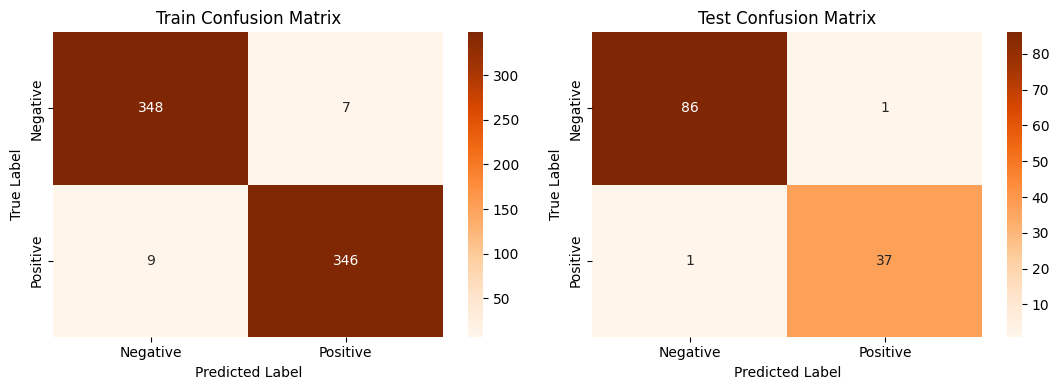


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.97479  | 0.980282 |   0.977528 | 355        |
| 1.0          |    0.98017  | 0.974648 |   0.977401 | 355        |
| accuracy     |    0.977465 | 0.977465 |   0.977465 |   0.977465 |
| macro avg    |    0.97748  | 0.977465 |   0.977465 | 710        |
| weighted avg |    0.97748  | 0.977465 |   0.977465 | 710        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.988506 | 0.988506 |   0.988506 |    87     |
| 1.0          |    0.973684 | 0.973684 |   0.973684 |    38     |
| accuracy     |    0.984    | 0.984    |   0.984    |     0.984 |
| macro avg    |    0.981095 | 0.981095 |   0.981095 |   125     |
| weighted avg |    0.984    | 0.984    |   0.984    |   125   

In [139]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, X_train, X_test, y_train, y_test)

In [140]:
score['Logistic regression tuned'] = lr_score2

In [141]:
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned
Precision Train             0.978907                   0.977480
Precision Test              0.984000                   0.984000
Recall Train                0.978873                   0.977465
Recall Test                 0.984000                   0.984000
Accuracy Train              0.978873                   0.977465
Accuracy Test               0.984000                   0.984000
ROC-AUC Train               0.978873                   0.977465
ROC-AUC Test                0.981095                   0.981095
F1 macro Train              0.978873                   0.977465
F1 macro Test               0.984000                   0.984000

In [142]:
# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 0.9985915492957746
Test ROC AUC: 0.9227162734422263


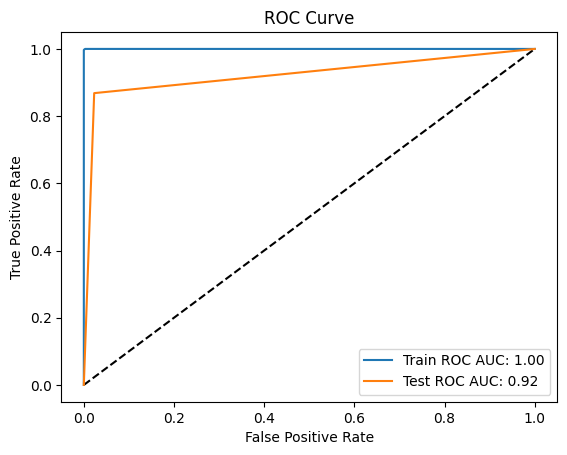


Confusion Matrix:


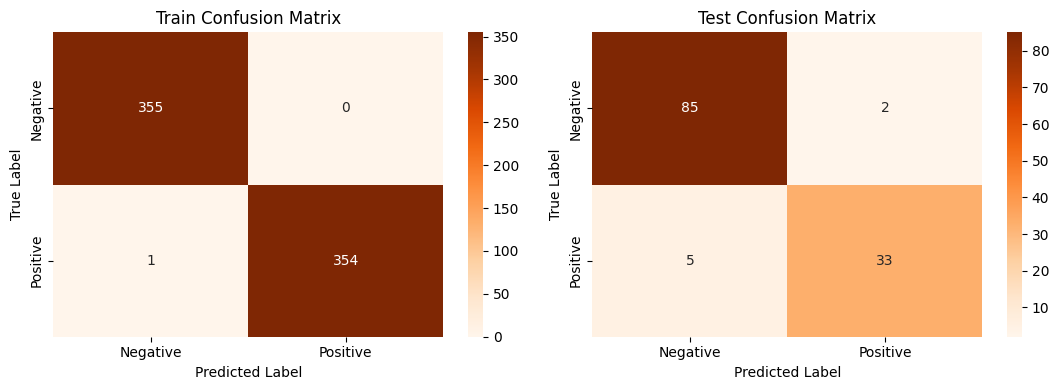


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.997191 | 1        |   0.998594 | 355        |
| 1.0          |    1        | 0.997183 |   0.99859  | 355        |
| accuracy     |    0.998592 | 0.998592 |   0.998592 |   0.998592 |
| macro avg    |    0.998596 | 0.998592 |   0.998592 | 710        |
| weighted avg |    0.998596 | 0.998592 |   0.998592 | 710        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.944444 | 0.977011 |   0.960452 |    87     |
| 1.0          |    0.942857 | 0.868421 |   0.90411  |    38     |
| accuracy     |    0.944    | 0.944    |   0.944    |     0.944 |
| macro avg    |    0.943651 | 0.922716 |   0.932281 |   125     |
| weighted avg |    0.943962 | 0.944    |   0.943324 |   125   

In [143]:
dt_score = evaluate_model(dt_model, X_train, X_test, y_train, y_test)

In [144]:
# Updated Evaluation metric Score Chart
score['Decision Tree'] = dt_score
score

Logistic regression  Logistic regression tuned  Decision Tree
Precision Train             0.978907                   0.977480       0.998596
Precision Test              0.984000                   0.984000       0.943962
Recall Train                0.978873                   0.977465       0.998592
Recall Test                 0.984000                   0.984000       0.944000
Accuracy Train              0.978873                   0.977465       0.998592
Accuracy Test               0.984000                   0.984000       0.944000
ROC-AUC Train               0.978873                   0.977465       0.998592
ROC-AUC Test                0.981095                   0.981095       0.922716
F1 macro Train              0.978873                   0.977465       0.998592
F1 macro Test               0.984000                   0.984000       0.943324

In [145]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [146]:
# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Train ROC AUC: 0.9788732394366197
Test ROC AUC: 0.9621899576527525


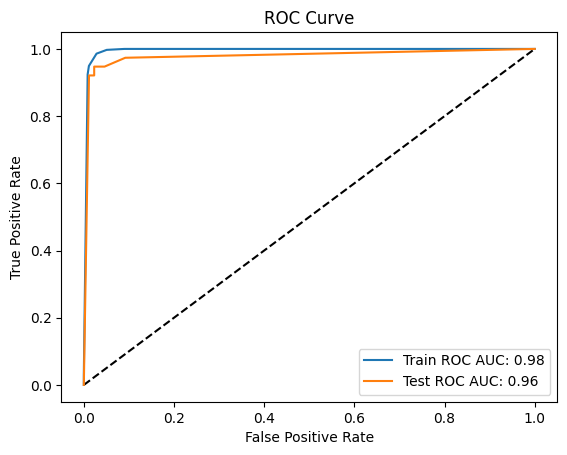


Confusion Matrix:


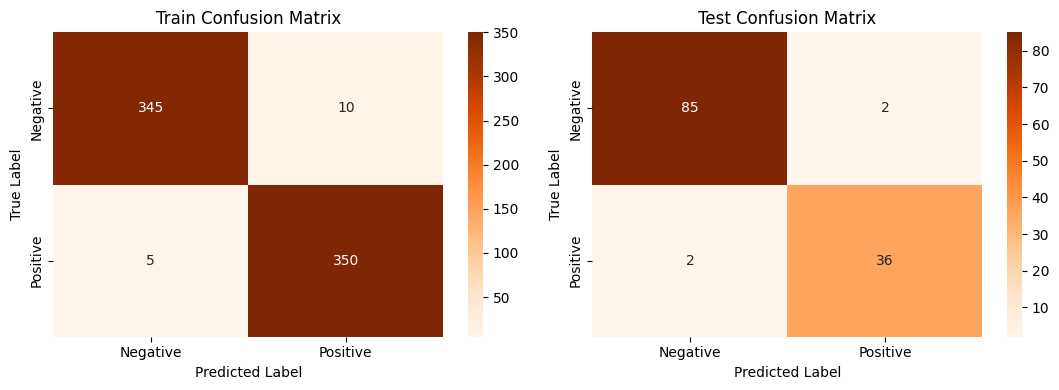


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.985714 | 0.971831 |   0.978723 | 355        |
| 1.0          |    0.972222 | 0.985915 |   0.979021 | 355        |
| accuracy     |    0.978873 | 0.978873 |   0.978873 |   0.978873 |
| macro avg    |    0.978968 | 0.978873 |   0.978872 | 710        |
| weighted avg |    0.978968 | 0.978873 |   0.978872 | 710        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.977011 | 0.977011 |   0.977011 |    87     |
| 1.0          |    0.947368 | 0.947368 |   0.947368 |    38     |
| accuracy     |    0.968    | 0.968    |   0.968    |     0.968 |
| macro avg    |    0.96219  | 0.96219  |   0.96219  |   125     |
| weighted avg |    0.968    | 0.968    |   0.968    |   125   

In [147]:
# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, X_train, X_test, y_train, y_test)
     

In [148]:
score['Decision Tree tuned'] = dt2_score
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.978907                   0.977480   
Precision Test              0.984000                   0.984000   
Recall Train                0.978873                   0.977465   
Recall Test                 0.984000                   0.984000   
Accuracy Train              0.978873                   0.977465   
Accuracy Test               0.984000                   0.984000   
ROC-AUC Train               0.978873                   0.977465   
ROC-AUC Test                0.981095                   0.981095   
F1 macro Train              0.978873                   0.977465   
F1 macro Test               0.984000                   0.984000   

                 Decision Tree  Decision Tree tuned  
Precision Train       0.998596             0.978968  
Precision Test        0.943962             0.968000  
Recall Train          0.998592             0.978873  
Recall Test           0.944000             0.968000  
Accuracy Train        0.998592             0.978873  
Accuracy Test         0.944000             0.968000  
ROC-AUC Train         0.998592             0.978873  
ROC-AUC Test          0.922716             0.962190  
F1 macro Train        0.998592             0.978872  
F1 macro Test         0.943324             0.968000

In [149]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model

In [150]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, X_train, X_test, y_train, y_test)


Train ROC AUC: 0.9985915492957746
Test ROC AUC: 0.954779189352692



Confusion Matrix:



Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.997191 | 1        |   0.998594 | 355        |
| 1.0          |    1        | 0.997183 |   0.99859  | 355        |
| accuracy     |    0.998592 | 0.998592 |   0.998592 |   0.998592 |
| macro avg    |    0.998596 | 0.998592 |   0.998592 | 710        |
| weighted avg |    0.998596 | 0.998592 |   0.998592 | 710        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.966292 | 0.988506 |   0.977273 |    87     |
| 1.0          |    0.972222 | 0.921053 |   0.945946 |    38     |
| accuracy     |    0.968    | 0.968    |   0.968    |     0.968 |
| macro avg    |    0.969257 | 0.954779 |   0.961609 |   125     |
| weighted avg |    0.968095 | 0.968    |   0.967749 |   125   

In [151]:
# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.978907                   0.977480   
Precision Test              0.984000                   0.984000   
Recall Train                0.978873                   0.977465   
Recall Test                 0.984000                   0.984000   
Accuracy Train              0.978873                   0.977465   
Accuracy Test               0.984000                   0.984000   
ROC-AUC Train               0.978873                   0.977465   
ROC-AUC Test                0.981095                   0.981095   
F1 macro Train              0.978873                   0.977465   
F1 macro Test               0.984000                   0.984000   

                 Decision Tree  Decision Tree tuned  Random Forest  
Precision Train       0.998596             0.978968       0.998596  
Precision Test        0.943962             0.968000       0.968095  
Recall Train          0.998592             0.978873       0.998592  
Recall Test           0.944000             0.968000       0.968000  
Accuracy Train        0.998592             0.978873       0.998592  
Accuracy Test         0.944000             0.968000       0.968000  
ROC-AUC Train         0.998592             0.978873       0.998592  
ROC-AUC Test          0.922716             0.962190       0.954779  
F1 macro Train        0.998592             0.978872       0.998592  
F1 macro Test         0.943324             0.968000       0.967749

In [152]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 8}


In [153]:
# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Train ROC AUC: 0.9901408450704225
Test ROC AUC: 0.9679370840895342



Confusion Matrix:


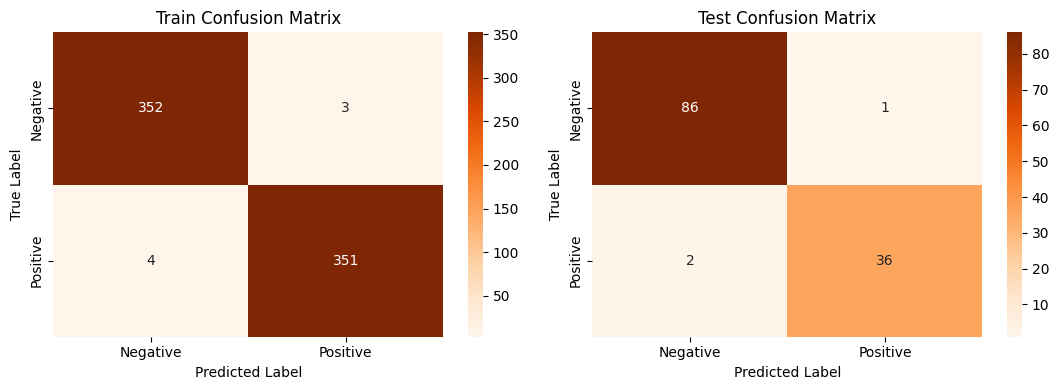


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.988764 | 0.991549 |   0.990155 | 355        |
| 1.0          |    0.991525 | 0.988732 |   0.990127 | 355        |
| accuracy     |    0.990141 | 0.990141 |   0.990141 |   0.990141 |
| macro avg    |    0.990145 | 0.990141 |   0.990141 | 710        |
| weighted avg |    0.990145 | 0.990141 |   0.990141 | 710        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.977273 | 0.988506 |   0.982857 |    87     |
| 1.0          |    0.972973 | 0.947368 |   0.96     |    38     |
| accuracy     |    0.976    | 0.976    |   0.976    |     0.976 |
| macro avg    |    0.975123 | 0.967937 |   0.971429 |   125     |
| weighted avg |    0.975966 | 0.976    |   0.975909 |   125   

In [154]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, X_train, X_test, y_train, y_test)

In [155]:
score['Random Forest tuned'] = rf2_score
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.978907                   0.977480   
Precision Test              0.984000                   0.984000   
Recall Train                0.978873                   0.977465   
Recall Test                 0.984000                   0.984000   
Accuracy Train              0.978873                   0.977465   
Accuracy Test               0.984000                   0.984000   
ROC-AUC Train               0.978873                   0.977465   
ROC-AUC Test                0.981095                   0.981095   
F1 macro Train              0.978873                   0.977465   
F1 macro Test               0.984000                   0.984000   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       0.998596             0.978968       0.998596   
Precision Test        0.943962             0.968000       0.968095   
Recall Train          0.998592             0.978873       0.998592   
Recall Test           0.944000             0.968000       0.968000   
Accuracy Train        0.998592             0.978873       0.998592   
Accuracy Test         0.944000             0.968000       0.968000   
ROC-AUC Train         0.998592             0.978873       0.998592   
ROC-AUC Test          0.922716             0.962190       0.954779   
F1 macro Train        0.998592             0.978872       0.998592   
F1 macro Test         0.943324             0.968000       0.967749   

                 Random Forest tuned  
Precision Train             0.990145  
Precision Test              0.975966  
Recall Train                0.990141  
Recall Test                 0.976000  
Accuracy Train              0.990141  
Accuracy Test               0.976000  
ROC-AUC Train               0.990141  
ROC-AUC Test                0.967937  
F1 macro Train              0.990141  
F1 macro Test               0.975909

In [156]:
# ML Model - 4 Implementation
svm_model = SVC(kernel='linear', random_state=0, probability=True)

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 0.9774647887323944
Test ROC AUC: 0.9810949788263763


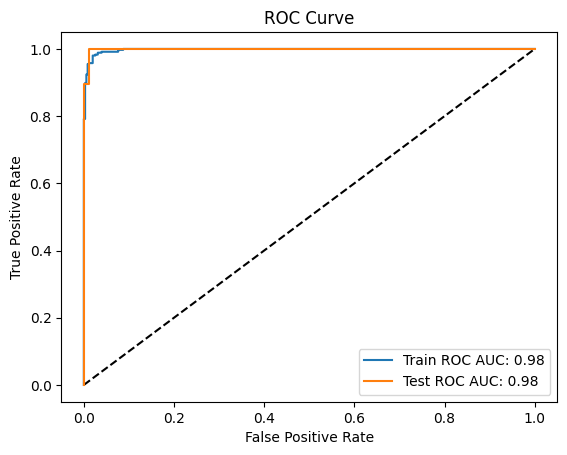


Confusion Matrix:


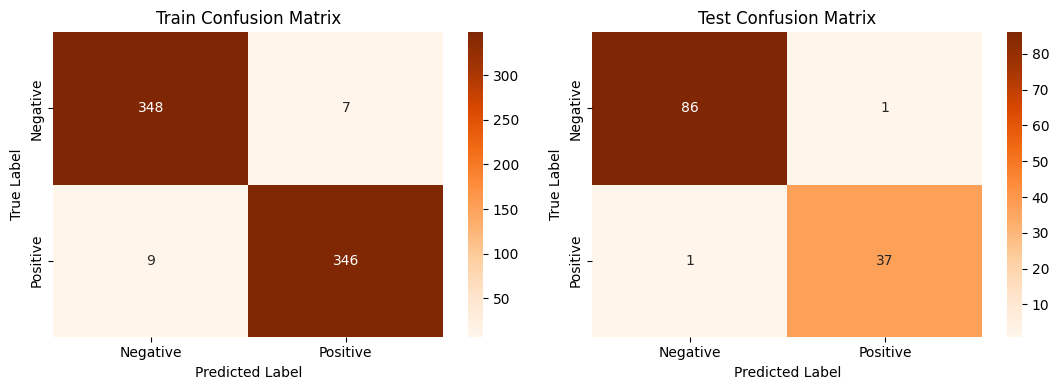


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.97479  | 0.980282 |   0.977528 | 355        |
| 1.0          |    0.98017  | 0.974648 |   0.977401 | 355        |
| accuracy     |    0.977465 | 0.977465 |   0.977465 |   0.977465 |
| macro avg    |    0.97748  | 0.977465 |   0.977465 | 710        |
| weighted avg |    0.97748  | 0.977465 |   0.977465 | 710        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.988506 | 0.988506 |   0.988506 |    87     |
| 1.0          |    0.973684 | 0.973684 |   0.973684 |    38     |
| accuracy     |    0.984    | 0.984    |   0.984    |     0.984 |
| macro avg    |    0.981095 | 0.981095 |   0.981095 |   125     |
| weighted avg |    0.984    | 0.984    |   0.984    |   125   

In [157]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, X_train, X_test, y_train, y_test)

In [158]:
# Updated Evaluation metric Score Chart
score['SVM'] = svm_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.978907                   0.977480   
Precision Test              0.984000                   0.984000   
Recall Train                0.978873                   0.977465   
Recall Test                 0.984000                   0.984000   
Accuracy Train              0.978873                   0.977465   
Accuracy Test               0.984000                   0.984000   
ROC-AUC Train               0.978873                   0.977465   
ROC-AUC Test                0.981095                   0.981095   
F1 macro Train              0.978873                   0.977465   
F1 macro Test               0.984000                   0.984000   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       0.998596             0.978968       0.998596   
Precision Test        0.943962             0.968000       0.968095   
Recall Train          0.998592             0.978873       0.998592   
Recall Test           0.944000             0.968000       0.968000   
Accuracy Train        0.998592             0.978873       0.998592   
Accuracy Test         0.944000             0.968000       0.968000   
ROC-AUC Train         0.998592             0.978873       0.998592   
ROC-AUC Test          0.922716             0.962190       0.954779   
F1 macro Train        0.998592             0.978872       0.998592   
F1 macro Test         0.943324             0.968000       0.967749   

                 Random Forest tuned       SVM  
Precision Train             0.990145  0.977480  
Precision Test              0.975966  0.984000  
Recall Train                0.990141  0.977465  
Recall Test                 0.976000  0.984000  
Accuracy Train              0.990141  0.977465  
Accuracy Test               0.976000  0.984000  
ROC-AUC Train               0.990141  0.977465  
ROC-AUC Test                0.967937  0.981095  
F1 macro Train              0.990141  0.977465  
F1 macro Test               0.975909  0.984000

In [159]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'rbf', 'degree': 4, 'C': 3.8000000000000003}


In [160]:
# Initialize model with best parameters
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Train ROC AUC: 0.9830985915492958
Test ROC AUC: 0.9810949788263763


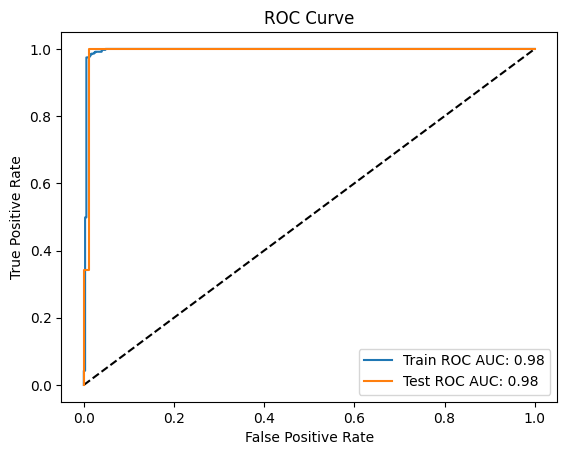


Confusion Matrix:


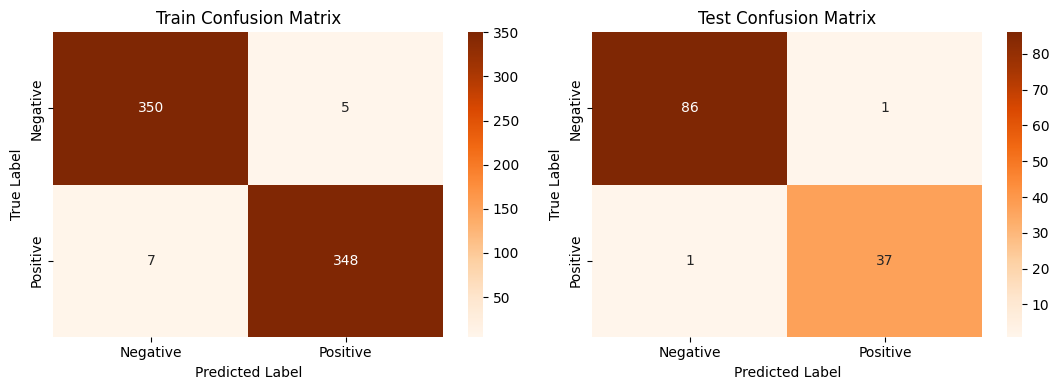


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.980392 | 0.985915 |   0.983146 | 355        |
| 1.0          |    0.985836 | 0.980282 |   0.983051 | 355        |
| accuracy     |    0.983099 | 0.983099 |   0.983099 |   0.983099 |
| macro avg    |    0.983114 | 0.983099 |   0.983098 | 710        |
| weighted avg |    0.983114 | 0.983099 |   0.983098 | 710        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.988506 | 0.988506 |   0.988506 |    87     |
| 1.0          |    0.973684 | 0.973684 |   0.973684 |    38     |
| accuracy     |    0.984    | 0.984    |   0.984    |     0.984 |
| macro avg    |    0.981095 | 0.981095 |   0.981095 |   125     |
| weighted avg |    0.984    | 0.984    |   0.984    |   125   

In [161]:
# Visualizing evaluation Metric Score chart
svm2_score = evaluate_model(svm_model2, X_train, X_test, y_train, y_test)

In [162]:
score['SVM tuned'] = svm2_score
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.978907                   0.977480   
Precision Test              0.984000                   0.984000   
Recall Train                0.978873                   0.977465   
Recall Test                 0.984000                   0.984000   
Accuracy Train              0.978873                   0.977465   
Accuracy Test               0.984000                   0.984000   
ROC-AUC Train               0.978873                   0.977465   
ROC-AUC Test                0.981095                   0.981095   
F1 macro Train              0.978873                   0.977465   
F1 macro Test               0.984000                   0.984000   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       0.998596             0.978968       0.998596   
Precision Test        0.943962             0.968000       0.968095   
Recall Train          0.998592             0.978873       0.998592   
Recall Test           0.944000             0.968000       0.968000   
Accuracy Train        0.998592             0.978873       0.998592   
Accuracy Test         0.944000             0.968000       0.968000   
ROC-AUC Train         0.998592             0.978873       0.998592   
ROC-AUC Test          0.922716             0.962190       0.954779   
F1 macro Train        0.998592             0.978872       0.998592   
F1 macro Test         0.943324             0.968000       0.967749   

                 Random Forest tuned       SVM  SVM tuned  
Precision Train             0.990145  0.977480   0.983114  
Precision Test              0.975966  0.984000   0.984000  
Recall Train                0.990141  0.977465   0.983099  
Recall Test                 0.976000  0.984000   0.984000  
Accuracy Train              0.990141  0.977465   0.983099  
Accuracy Test               0.976000  0.984000   0.984000  
ROC-AUC Train               0.990141  0.977465   0.983099  
ROC-AUC Test                0.967937  0.981095   0.981095  
F1 macro Train              0.990141  0.977465   0.983098  
F1 macro Test               0.975909  0.984000   0.984000

In [163]:
# ML Model - 5 Implementation
xgb_model = xgb.XGBClassifier()

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 0.9943661971830986
Test ROC AUC: 0.9490320629159105


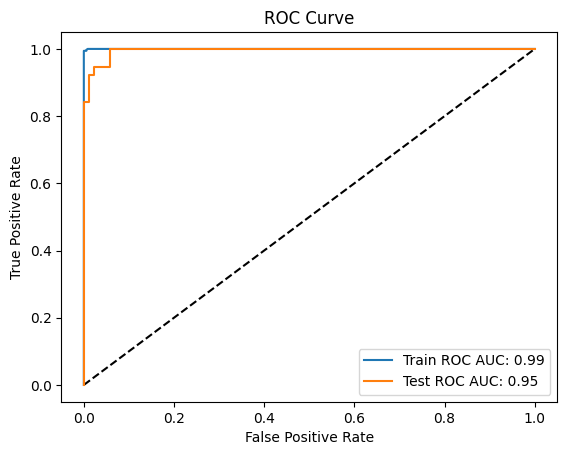


Confusion Matrix:



Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.994366 | 0.994366 |   0.994366 | 355        |
| 1.0          |    0.994366 | 0.994366 |   0.994366 | 355        |
| accuracy     |    0.994366 | 0.994366 |   0.994366 |   0.994366 |
| macro avg    |    0.994366 | 0.994366 |   0.994366 | 710        |
| weighted avg |    0.994366 | 0.994366 |   0.994366 | 710        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.965909 | 0.977011 |   0.971429 |     87    |
| 1.0          |    0.945946 | 0.921053 |   0.933333 |     38    |
| accuracy     |    0.96     | 0.96     |   0.96     |      0.96 |
| macro avg    |    0.955928 | 0.949032 |   0.952381 |    125    |
| weighted avg |    0.95984  | 0.96     |   0.959848 |    125  

In [164]:
# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)

In [165]:

# Updated Evaluation metric Score Chart
score['XGB'] = xgb_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.978907                   0.977480   
Precision Test              0.984000                   0.984000   
Recall Train                0.978873                   0.977465   
Recall Test                 0.984000                   0.984000   
Accuracy Train              0.978873                   0.977465   
Accuracy Test               0.984000                   0.984000   
ROC-AUC Train               0.978873                   0.977465   
ROC-AUC Test                0.981095                   0.981095   
F1 macro Train              0.978873                   0.977465   
F1 macro Test               0.984000                   0.984000   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       0.998596             0.978968       0.998596   
Precision Test        0.943962             0.968000       0.968095   
Recall Train          0.998592             0.978873       0.998592   
Recall Test           0.944000             0.968000       0.968000   
Accuracy Train        0.998592             0.978873       0.998592   
Accuracy Test         0.944000             0.968000       0.968000   
ROC-AUC Train         0.998592             0.978873       0.998592   
ROC-AUC Test          0.922716             0.962190       0.954779   
F1 macro Train        0.998592             0.978872       0.998592   
F1 macro Test         0.943324             0.968000       0.967749   

                 Random Forest tuned       SVM  SVM tuned       XGB  
Precision Train             0.990145  0.977480   0.983114  0.994366  
Precision Test              0.975966  0.984000   0.984000  0.959840  
Recall Train                0.990141  0.977465   0.983099  0.994366  
Recall Test                 0.976000  0.984000   0.984000  0.960000  
Accuracy Train              0.990141  0.977465   0.983099  0.994366  
Accuracy Test               0.976000  0.984000   0.984000  0.960000  
ROC-AUC Train               0.990141  0.977465   0.983099  0.994366  
ROC-AUC Test                0.967937  0.981095   0.981095  0.949032  
F1 macro Train              0.990141  0.977465   0.983098  0.994366  
F1 macro Test               0.975909  0.984000   0.984000  0.959848

In [166]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2 = xgb.XGBClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 130, 'max_depth': 10, 'learning_rate': 0.25}


In [167]:
# Initialize model with best parameters
xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


Train ROC AUC: 0.9943661971830986
Test ROC AUC: 0.9490320629159105


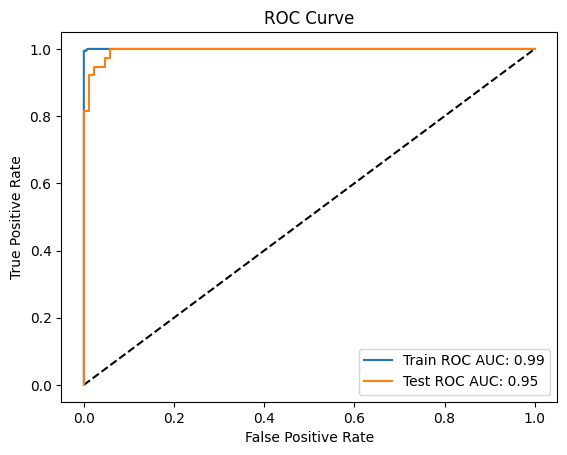


Confusion Matrix:



Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.994366 | 0.994366 |   0.994366 | 355        |
| 1.0          |    0.994366 | 0.994366 |   0.994366 | 355        |
| accuracy     |    0.994366 | 0.994366 |   0.994366 |   0.994366 |
| macro avg    |    0.994366 | 0.994366 |   0.994366 | 710        |
| weighted avg |    0.994366 | 0.994366 |   0.994366 | 710        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.965909 | 0.977011 |   0.971429 |     87    |
| 1.0          |    0.945946 | 0.921053 |   0.933333 |     38    |
| accuracy     |    0.96     | 0.96     |   0.96     |      0.96 |
| macro avg    |    0.955928 | 0.949032 |   0.952381 |    125    |
| weighted avg |    0.95984  | 0.96     |   0.959848 |    125  

In [168]:
# Visualizing evaluation Metric Score chart
xgb2_score = evaluate_model(xgb_model2, X_train, X_test, y_train, y_test)

In [169]:
score['XGB tuned'] = xgb2_score
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.978907                   0.977480   
Precision Test              0.984000                   0.984000   
Recall Train                0.978873                   0.977465   
Recall Test                 0.984000                   0.984000   
Accuracy Train              0.978873                   0.977465   
Accuracy Test               0.984000                   0.984000   
ROC-AUC Train               0.978873                   0.977465   
ROC-AUC Test                0.981095                   0.981095   
F1 macro Train              0.978873                   0.977465   
F1 macro Test               0.984000                   0.984000   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       0.998596             0.978968       0.998596   
Precision Test        0.943962             0.968000       0.968095   
Recall Train          0.998592             0.978873       0.998592   
Recall Test           0.944000             0.968000       0.968000   
Accuracy Train        0.998592             0.978873       0.998592   
Accuracy Test         0.944000             0.968000       0.968000   
ROC-AUC Train         0.998592             0.978873       0.998592   
ROC-AUC Test          0.922716             0.962190       0.954779   
F1 macro Train        0.998592             0.978872       0.998592   
F1 macro Test         0.943324             0.968000       0.967749   

                 Random Forest tuned       SVM  SVM tuned       XGB  XGB tuned  
Precision Train             0.990145  0.977480   0.983114  0.994366   0.994366  
Precision Test              0.975966  0.984000   0.984000  0.959840   0.959840  
Recall Train                0.990141  0.977465   0.983099  0.994366   0.994366  
Recall Test                 0.976000  0.984000   0.984000  0.960000   0.960000  
Accuracy Train              0.990141  0.977465   0.983099  0.994366   0.994366  
Accuracy Test               0.976000  0.984000   0.984000  0.960000   0.960000  
ROC-AUC Train               0.990141  0.977465   0.983099  0.994366   0.994366  
ROC-AUC Test                0.967937  0.981095   0.981095  0.949032   0.949032  
F1 macro Train              0.990141  0.977465   0.983098  0.994366   0.994366  
F1 macro Test               0.975909  0.984000   0.984000  0.959848   0.959848

In [170]:
# ML Model - 6 Implementation
nb_model = GaussianNB()

# Model is trained (fit) and predicted in the evaluate model

In [171]:
# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, X_train, X_test, y_train, y_test)


Train ROC AUC: 0.9647887323943661
Test ROC AUC: 0.9827586206896552



Confusion Matrix:



Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.976879 | 0.952113 |   0.964337 | 355        |
| 1.0          |    0.953297 | 0.977465 |   0.965229 | 355        |
| accuracy     |    0.964789 | 0.964789 |   0.964789 |   0.964789 |
| macro avg    |    0.965088 | 0.964789 |   0.964783 | 710        |
| weighted avg |    0.965088 | 0.964789 |   0.964783 | 710        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    1        | 0.965517 |   0.982456 |    87     |
| 1.0          |    0.926829 | 1        |   0.962025 |    38     |
| accuracy     |    0.976    | 0.976    |   0.976    |     0.976 |
| macro avg    |    0.963415 | 0.982759 |   0.972241 |   125     |
| weighted avg |    0.977756 | 0.976    |   0.976245 |   125   

In [172]:
# Updated Evaluation metric Score Chart
score['Naive Bayes'] = nb_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.978907                   0.977480   
Precision Test              0.984000                   0.984000   
Recall Train                0.978873                   0.977465   
Recall Test                 0.984000                   0.984000   
Accuracy Train              0.978873                   0.977465   
Accuracy Test               0.984000                   0.984000   
ROC-AUC Train               0.978873                   0.977465   
ROC-AUC Test                0.981095                   0.981095   
F1 macro Train              0.978873                   0.977465   
F1 macro Test               0.984000                   0.984000   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       0.998596             0.978968       0.998596   
Precision Test        0.943962             0.968000       0.968095   
Recall Train          0.998592             0.978873       0.998592   
Recall Test           0.944000             0.968000       0.968000   
Accuracy Train        0.998592             0.978873       0.998592   
Accuracy Test         0.944000             0.968000       0.968000   
ROC-AUC Train         0.998592             0.978873       0.998592   
ROC-AUC Test          0.922716             0.962190       0.954779   
F1 macro Train        0.998592             0.978872       0.998592   
F1 macro Test         0.943324             0.968000       0.967749   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.990145  0.977480   0.983114  0.994366   
Precision Test              0.975966  0.984000   0.984000  0.959840   
Recall Train                0.990141  0.977465   0.983099  0.994366   
Recall Test                 0.976000  0.984000   0.984000  0.960000   
Accuracy Train              0.990141  0.977465   0.983099  0.994366   
Accuracy Test               0.976000  0.984000   0.984000  0.960000   
ROC-AUC Train               0.990141  0.977465   0.983099  0.994366   
ROC-AUC Test                0.967937  0.981095   0.981095  0.949032   
F1 macro Train              0.990141  0.977465   0.983098  0.994366   
F1 macro Test               0.975909  0.984000   0.984000  0.959848   

                 XGB tuned  Naive Bayes  
Precision Train   0.994366     0.965088  
Precision Test    0.959840     0.977756  
Recall Train      0.994366     0.964789  
Recall Test       0.960000     0.976000  
Accuracy Train    0.994366     0.964789  
Accuracy Test     0.960000     0.976000  
ROC-AUC Train     0.994366     0.964789  
ROC-AUC Test      0.949032     0.982759  
F1 macro Train    0.994366     0.964783  
F1 macro Test     0.959848     0.976245

In [173]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(X_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': 0.01519911082952933}


In [174]:
# Initiate model with best parameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Train ROC AUC: 0.9647887323943662
Test ROC AUC: 0.9753478523895948



Confusion Matrix:


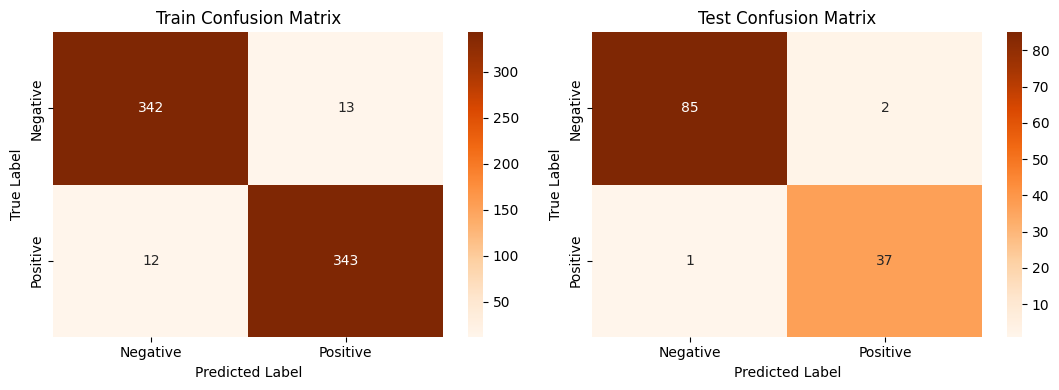


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.966102 | 0.96338  |   0.964739 | 355        |
| 1.0          |    0.963483 | 0.966197 |   0.964838 | 355        |
| accuracy     |    0.964789 | 0.964789 |   0.964789 |   0.964789 |
| macro avg    |    0.964792 | 0.964789 |   0.964789 | 710        |
| weighted avg |    0.964792 | 0.964789 |   0.964789 | 710        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.988372 | 0.977011 |   0.982659 |    87     |
| 1.0          |    0.948718 | 0.973684 |   0.961039 |    38     |
| accuracy     |    0.976    | 0.976    |   0.976    |     0.976 |
| macro avg    |    0.968545 | 0.975348 |   0.971849 |   125     |
| weighted avg |    0.976317 | 0.976    |   0.976086 |   125   

In [175]:
# Visualizing evaluation Metric Score chart
nb2_score = evaluate_model(nb_model2, X_train, X_test, y_train, y_test)

# Clasification

In [176]:
score['Naive Bayes tuned']= nb2_score

In [177]:
# Updated Evaluation metric Score Chart
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.978907                   0.977480   
Precision Test              0.984000                   0.984000   
Recall Train                0.978873                   0.977465   
Recall Test                 0.984000                   0.984000   
Accuracy Train              0.978873                   0.977465   
Accuracy Test               0.984000                   0.984000   
ROC-AUC Train               0.978873                   0.977465   
ROC-AUC Test                0.981095                   0.981095   
F1 macro Train              0.978873                   0.977465   
F1 macro Test               0.984000                   0.984000   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       0.998596             0.978968       0.998596   
Precision Test        0.943962             0.968000       0.968095   
Recall Train          0.998592             0.978873       0.998592   
Recall Test           0.944000             0.968000       0.968000   
Accuracy Train        0.998592             0.978873       0.998592   
Accuracy Test         0.944000             0.968000       0.968000   
ROC-AUC Train         0.998592             0.978873       0.998592   
ROC-AUC Test          0.922716             0.962190       0.954779   
F1 macro Train        0.998592             0.978872       0.998592   
F1 macro Test         0.943324             0.968000       0.967749   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.990145  0.977480   0.983114  0.994366   
Precision Test              0.975966  0.984000   0.984000  0.959840   
Recall Train                0.990141  0.977465   0.983099  0.994366   
Recall Test                 0.976000  0.984000   0.984000  0.960000   
Accuracy Train              0.990141  0.977465   0.983099  0.994366   
Accuracy Test               0.976000  0.984000   0.984000  0.960000   
ROC-AUC Train               0.990141  0.977465   0.983099  0.994366   
ROC-AUC Test                0.967937  0.981095   0.981095  0.949032   
F1 macro Train              0.990141  0.977465   0.983098  0.994366   
F1 macro Test               0.975909  0.984000   0.984000  0.959848   

                 XGB tuned  Naive Bayes  Naive Bayes tuned  
Precision Train   0.994366     0.965088           0.964792  
Precision Test    0.959840     0.977756           0.976317  
Recall Train      0.994366     0.964789           0.964789  
Recall Test       0.960000     0.976000           0.976000  
Accuracy Train    0.994366     0.964789           0.964789  
Accuracy Test     0.960000     0.976000           0.976000  
ROC-AUC Train     0.994366     0.964789           0.964789  
ROC-AUC Test      0.949032     0.982759           0.975348  
F1 macro Train    0.994366     0.964783           0.964789  
F1 macro Test     0.959848     0.976245           0.976086

In [178]:
print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |      SVM |   SVM tuned |      XGB |   XGB tuned |   Naive Bayes |   Naive Bayes tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|------------:|---------:|------------:|--------------:|--------------------:|
| Precision Train |              0.978907 |                    0.97748  |        0.998596 |              0.978968 |        0.998596 |              0.990145 | 0.97748  |    0.983114 | 0.994366 |    0.994366 |      0.965088 |            0.964792 |
| Precision Test  |              0.984    |                    0.984    |        0.943962 |              0.968    |        0.968095 |              0.975966 | 0.984    |    0.984    | 0.95984  |    0.95984  |      0.977756 |            0.976317 |
| Recall Train  

In [179]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.978907                   0.977480   
Precision Test              0.984000                   0.984000   
Recall Train                0.978873                   0.977465   
Recall Test                 0.984000                   0.984000   
Accuracy Train              0.978873                   0.977465   
Accuracy Test               0.984000                   0.984000   
ROC-AUC Train               0.978873                   0.977465   
ROC-AUC Test                0.981095                   0.981095   
F1 macro Train              0.978873                   0.977465   
F1 macro Test               0.984000                   0.984000   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       0.998596             0.978968       0.998596   
Precision Test        0.943962             0.968000       0.968095   
Recall Train          0.998592             0.978873       0.998592   
Recall Test           0.944000             0.968000       0.968000   
Accuracy Train        0.998592             0.978873       0.998592   
Accuracy Test         0.944000             0.968000       0.968000   
ROC-AUC Train         0.998592             0.978873       0.998592   
ROC-AUC Test          0.922716             0.962190       0.954779   
F1 macro Train        0.998592             0.978872       0.998592   
F1 macro Test         0.943324             0.968000       0.967749   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.990145  0.977480   0.983114  0.994366   
Precision Test              0.975966  0.984000   0.984000  0.959840   
Recall Train                0.990141  0.977465   0.983099  0.994366   
Recall Test                 0.976000  0.984000   0.984000  0.960000   
Accuracy Train              0.990141  0.977465   0.983099  0.994366   
Accuracy Test               0.976000  0.984000   0.984000  0.960000   
ROC-AUC Train               0.990141  0.977465   0.983099  0.994366   
ROC-AUC Test                0.967937  0.981095   0.981095  0.949032   
F1 macro Train              0.990141  0.977465   0.983098  0.994366   
F1 macro Test               0.975909  0.984000   0.984000  0.959848   

                 XGB tuned  Naive Bayes  Naive Bayes tuned  
Precision Train   0.994366     0.965088           0.964792  
Precision Test    0.959840     0.977756           0.976317  
Recall Train      0.994366     0.964789           0.964789  
Recall Test       0.960000     0.976000           0.976000  
Accuracy Train    0.994366     0.964789           0.964789  
Accuracy Test     0.960000     0.976000           0.976000  
ROC-AUC Train     0.994366     0.964789           0.964789  
ROC-AUC Test      0.949032     0.982759           0.975348  
F1 macro Train    0.994366     0.964783           0.964789  
F1 macro Test     0.959848     0.976245           0.976086

In [180]:
# Removing the overfitted models which have recall, ROC-AUC, f1 scores for train as 1
score_t = score.transpose()            #taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']==1].index  #creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['ROC-AUC Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)         #creating a new dataframe with required models
adj

Precision Train  Precision Test  Recall Train  \
Logistic regression               0.978907        0.984000      0.978873   
Logistic regression tuned         0.977480        0.984000      0.977465   
Decision Tree                     0.998596        0.943962      0.998592   
Decision Tree tuned               0.978968        0.968000      0.978873   
Random Forest                     0.998596        0.968095      0.998592   
Random Forest tuned               0.990145        0.975966      0.990141   
SVM                               0.977480        0.984000      0.977465   
SVM tuned                         0.983114        0.984000      0.983099   
XGB                               0.994366        0.959840      0.994366   
XGB tuned                         0.994366        0.959840      0.994366   
Naive Bayes                       0.965088        0.977756      0.964789   
Naive Bayes tuned                 0.964792        0.976317      0.964789   

                           Recall Test  Accuracy Train  Accuracy Test  \
Logistic regression              0.984        0.978873          0.984   
Logistic regression tuned        0.984        0.977465          0.984   
Decision Tree                    0.944        0.998592          0.944   
Decision Tree tuned              0.968        0.978873          0.968   
Random Forest                    0.968        0.998592          0.968   
Random Forest tuned              0.976        0.990141          0.976   
SVM                              0.984        0.977465          0.984   
SVM tuned                        0.984        0.983099          0.984   
XGB                              0.960        0.994366          0.960   
XGB tuned                        0.960        0.994366          0.960   
Naive Bayes                      0.976        0.964789          0.976   
Naive Bayes tuned                0.976        0.964789          0.976   

                           ROC-AUC Train  ROC-AUC Test  F1 macro Train  \
Logistic regression             0.978873      0.981095        0.978873   
Logistic regression tuned       0.977465      0.981095        0.977465   
Decision Tree                   0.998592      0.922716        0.998592   
Decision Tree tuned             0.978873      0.962190        0.978872   
Random Forest                   0.998592      0.954779        0.998592   
Random Forest tuned             0.990141      0.967937        0.990141   
SVM                             0.977465      0.981095        0.977465   
SVM tuned                       0.983099      0.981095        0.983098   
XGB                             0.994366      0.949032        0.994366   
XGB tuned                       0.994366      0.949032        0.994366   
Naive Bayes                     0.964789      0.982759        0.964783   
Naive Bayes tuned               0.964789      0.975348        0.964789   

                           F1 macro Test  
Logistic regression             0.984000  
Logistic regression tuned       0.984000  
Decision Tree                   0.943324  
Decision Tree tuned             0.968000  
Random Forest                   0.967749  
Random Forest tuned             0.975909  
SVM                             0.984000  
SVM tuned                       0.984000  
XGB                             0.959848  
XGB tuned                       0.959848  
Naive Bayes                     0.976245  
Naive Bayes tuned               0.976086

In [181]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

# Best Models Accuracy

In [182]:
metrics = ['Precision','Recall', 'Accuracy', 'ROC-AUC', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Logistic regression - 0.984
Recall: Logistic regression - 0.984
Accuracy: Logistic regression - 0.984
ROC-AUC: Naive Bayes - 0.9828
F1 macro: Logistic regression - 0.984


In [183]:
# # Take recall as the primary evaluation metric
# score_smpl = score.transpose()
# remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=score_smpl['Recall Test']].index
# remove_overfitting_models
# new_score = score_smpl.drop(remove_overfitting_models)
# new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','ROC-AUC Train','ROC-AUC Test','F1 macro Train','F1 macro Test'], axis=1)
# new_score.index.name = 'Classification Model'
# #print(new_score.to_markdown())
# new_score = (new_score * 100).round(2)
# print(new_score)

In [184]:
# Take recall as the primary evaluation metric
score_smpl = score.transpose()

# KEEP the top 3 models with highest Recall Test
top_models = score_smpl.sort_values(by='Recall Test', ascending=False).head(3)

# Drop irrelevant columns
top_models = top_models.drop([
    'Precision Train', 'Precision Test', 'Accuracy Train', 'Accuracy Test',
    'ROC-AUC Train', 'ROC-AUC Test', 'F1 macro Train', 'F1 macro Test'
], axis=1)

# Rename index
top_models.index.name = 'Classification Model'

# Print as markdown
print(top_models.to_markdown())

| Classification Model      |   Recall Train |   Recall Test |
|:--------------------------|---------------:|--------------:|
| Logistic regression       |       0.978873 |         0.984 |
| Logistic regression tuned |       0.977465 |         0.984 |
| SVM                       |       0.977465 |         0.984 |
